Importing all the dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading mnist dataset from keras.datasets

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
type(x_train)

numpy.ndarray

In [5]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


60,000 training images each with dimenson of 28 x 28 and all are grayscale images

In [6]:
#printing the 10th image
print(x_train[9])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18   

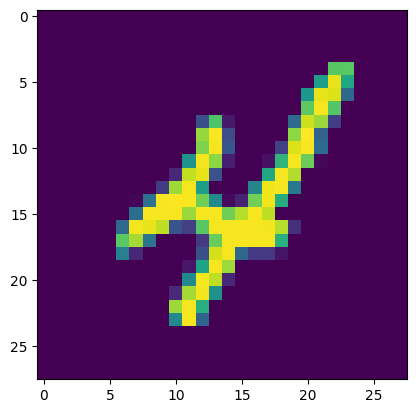

4


In [7]:
img_plot = plt.imshow(x_train[9])
plt.show()
print(y_train[9])

In [8]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can apply one-hot encoding.

In [9]:
#scaling the values or also called normalization because we have values from 0 to 255 , so values are far like 80 or 255 which will take time for calculation in neural network, so we will scale down all values between 0 and 1.Accuracy varies with this.
x_train = x_train/255
x_test = x_test/255

In [10]:
print(x_train[9])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building neural network not using cnn's here(very efficient neural network used for image recognisition) neither using rnn's(used for text and speech recognition)

In [11]:
# setting up layers for neural network
model = keras.Sequential([
                    keras.layers.Flatten(input_shape = (28,28)),
                    keras.layers.Dense(50, activation='relu'),
                    keras.layers.Dense(50, activation='relu'),
                    keras.layers.Dense(10, activation='sigmoid')  # here 10 denotes no. of neurons in output layer i,e [0 1 2 3 4 5 6 7 8 9]

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# compiling the neural network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',  # here for one hot encoding we have to use loss = categorical_crossentropy.
              metrics = ['accuracy'])

In [13]:
# training the neural network
model.fit(x_train,y_train, epochs=10) #epochs means how many times your neural network should go through the data.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8441 - loss: 0.5295
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9547 - loss: 0.1531
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9676 - loss: 0.1097
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9739 - loss: 0.0868
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9780 - loss: 0.0712
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9814 - loss: 0.0595
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9850 - loss: 0.0490
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9878 - loss: 0.0407
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9891 - loss: 0.0354
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9906 - loss: 0.0316


Training data accuracy = 99.09%

Accuracy on test data(model evaluation part):

In [14]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9637 - loss: 0.1265


Test data accuracy = 96.98%

In [15]:
print(x_test.shape)

(10000, 28, 28)


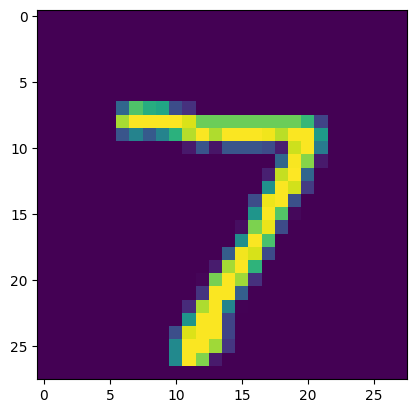

In [16]:
plt.imshow(x_test[0])

In [17]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
print(y_pred.shape)

(10000, 10)


In [19]:
print(y_pred[0])

[2.4532098e-03 6.7865774e-05 8.4188789e-02 9.7640657e-01 6.6843850e-04
 6.2120028e-02 7.3364403e-10 9.9999946e-01 8.6452895e-01 9.4470394e-01]


In the above output the predict function shows what is the probability of image being 0,1,2,3,4,5,6,7,8,9. we can see that for image as 7 it has maximum probability.In the y_pred shape also 10 wa sdue to this reason only.
model.predict() gives prediction probability of each class(here 0 to 9) for that data point

In [20]:
#converting the prediction probabilities to the class labels
label_for_first_image = np.argmax(y_pred[0])
print(label_for_first_image)

7


7 denotes value at the index 7 is the maximum value.

In [21]:
#converting the prediction probabilities to the class labels for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 3, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 3, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_pred --> predicted labels
y_test --> true labels

Confusion matrix

In [22]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [23]:
print(conf_mat)

tf.Tensor(
[[ 963    0    2    1    1    3    4    1    1    4]
 [   1 1090    1    6    1    4    3    1   28    0]
 [   4    0 1002    7    1    2    5    5    6    0]
 [   0    0    3  987    1    5    0    2    3    9]
 [   0    0    4    0  946    1    7    4    2   18]
 [   2    0    0   37    1  841    2    0    4    5]
 [   6    1    3    1    2    7  936    1    1    0]
 [   1    3    6    6    1    0    0  986    6   19]
 [   2    0    1   21    4    5    3    4  931    3]
 [   1    1    0    7    9    5    0    3    6  977]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

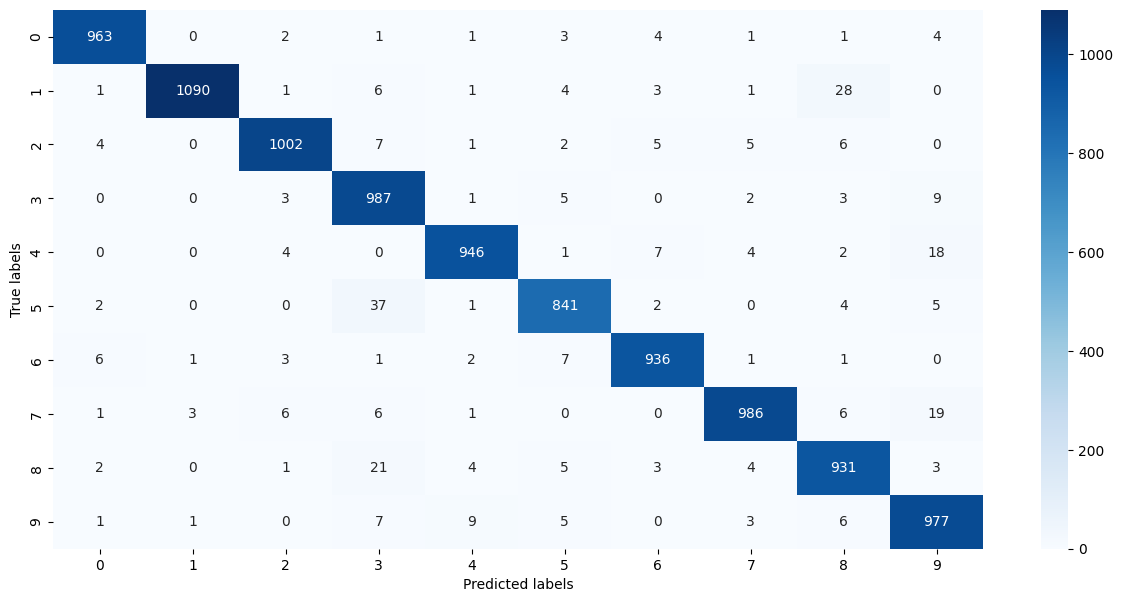

In [24]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

Building a Predictive System(i,e. we will give a new image to our builded neural network and it will predict )

In [26]:
input_image_path = '/content/MNIST_digit.png'
input_image = cv2.imread(input_image_path)

In [28]:
type(input_image)

numpy.ndarray

In [29]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


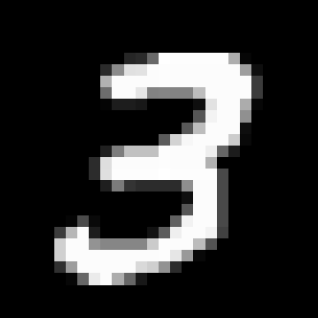

In [30]:
cv2_imshow(input_image)

In [31]:
input_image.shape

(318, 318, 3)

In [32]:
gray = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [35]:
gray.shape

(318, 318)

In [36]:
resized_img = cv2.resize(gray, (28,28))

In [38]:
resized_img.shape

(28, 28)

In [39]:
resized_img = resized_img/255

In [40]:
image_reshaped = np.reshape(resized_img, [1,28,28])

In [41]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[1.7636555e-11 2.7469888e-01 8.7655563e-04 1.0000000e+00 5.7055183e-07
  4.4594765e-01 5.8972933e-16 1.2992757e-03 7.0896968e-02 9.7638696e-01]]


In [42]:
new_img = np.argmax(input_prediction)
print(new_img)

3


Predictive system:

path of the input image to be predicted:/content/2024-12-03.png


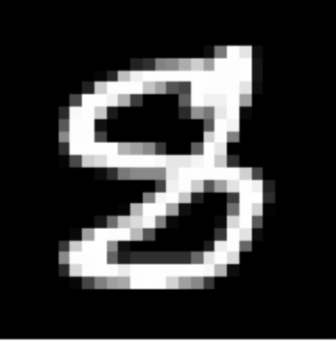

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The Handwritten digigt is recognised as  8


In [47]:
input_image_path = input('path of the input image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

gray = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

resized_img = cv2.resize(gray, (28,28))

resized_img = resized_img/255

image_reshaped = np.reshape(resized_img, [1,28,28])

input_prediction = model.predict(image_reshaped)

new_img = np.argmax(input_prediction)

print('The Handwritten digigt is recognised as ',new_img)